_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [1]:
## cargar el dataset

In [2]:
import pandas as pd
airQData = pd.read_csv('AirQualityUCI.csv', sep=';')
airQData.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888",NaN,NaN


In [3]:
## ¿cuántas instancias tiene el dataset?

In [4]:
airQData.shape

(9357, 17)

En la página del dataset indica que este contiene 9358 instacias, sin embargo al cargarlo obtenemos un total de 9471.
Esto es debido a que el csv que ofrecen contiene 113 filas sin valores. Estas filas se eliminarán. El resultado de airQData.shape da 9357 ya que la primera fila no es una instacnia como tal sinó los títulos de las columnas. También se puede observar que al cargarlo se generan dos columnas extras ya que las filas acaban con ;;, estas están vacías y sin título por lo que también se procederán a eliminar:

In [5]:
airQData = airQData.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
airQData.shape

(9357, 15)

In [6]:
## ¿cuál es el tipo de datos de cada una de las columnas?


Para poder trabajar con los datos algunas de estas variables se van a convertir en floats, además algunas columnas en la documentación del dataset se identifican como enteros cuando los datos son floats.

| Columna | Tipo de datos (documentación dataset) | Tipo de datos (convertidos) |
|---------|---------------------------------------|-----------------------------|
| Date | Date (DD/MM/YYYY) | Date (DD/MM/YYYY) |
| Time | Categórico | Categórico |
| CO(GT) | Entero | Float |
| PT08.S1(CO) | Categóricao | Categóricao |
| NMHC(GT) | Entero | Entero |
| C6H6(GT) | Continuo | Float |
| PT08.S2(NMHC)	| Categórico | Categórico |
| NOx(GT)	| Entero | Entero |
| PT08.S3(NOx)	| Categórico | Categórico |
| NO2(GT)	| Entero | Entero |
| PT08.S4(NO2)	| Categórico | Categórico |
| PT08.S5(O3)	| Categórico | Categórico |
| T	| Continuo | Float |
| RH	| Continuo | Float |
| AH	| Continuo | Float |


In [7]:
airQData['CO(GT)']= airQData['CO(GT)'].str.replace(',','.').astype(float)
airQData['C6H6(GT)']= airQData['C6H6(GT)'].str.replace(',','.').astype(float)
airQData['T']= airQData['T'].str.replace(',','.').astype(float)
airQData['RH']= airQData['RH'].str.replace(',','.').astype(float)
airQData['AH']= airQData['AH'].str.replace(',','.').astype(float)
airQData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [8]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?

Hay 6 categóricas y 4 continuas

In [9]:
## ¿existen valores nulos en el dataset?

Si realizamos airQData.info() vemos que no hay valores nulos como tal y esto es porque no hay valores vacíos en ninguna instancia, sin embargo en la documentación del dataset nos indica que si tenemos valores faltantes y que estos se indican con un -200.

In [10]:
## ¿cuál es la variable respuesta?¿de qué tipo es?

La variable respuesta será CO(GT), que es la concentración promedia por hora de CO en mg/m^3. Esta será una variable de tipo float.

In [11]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 

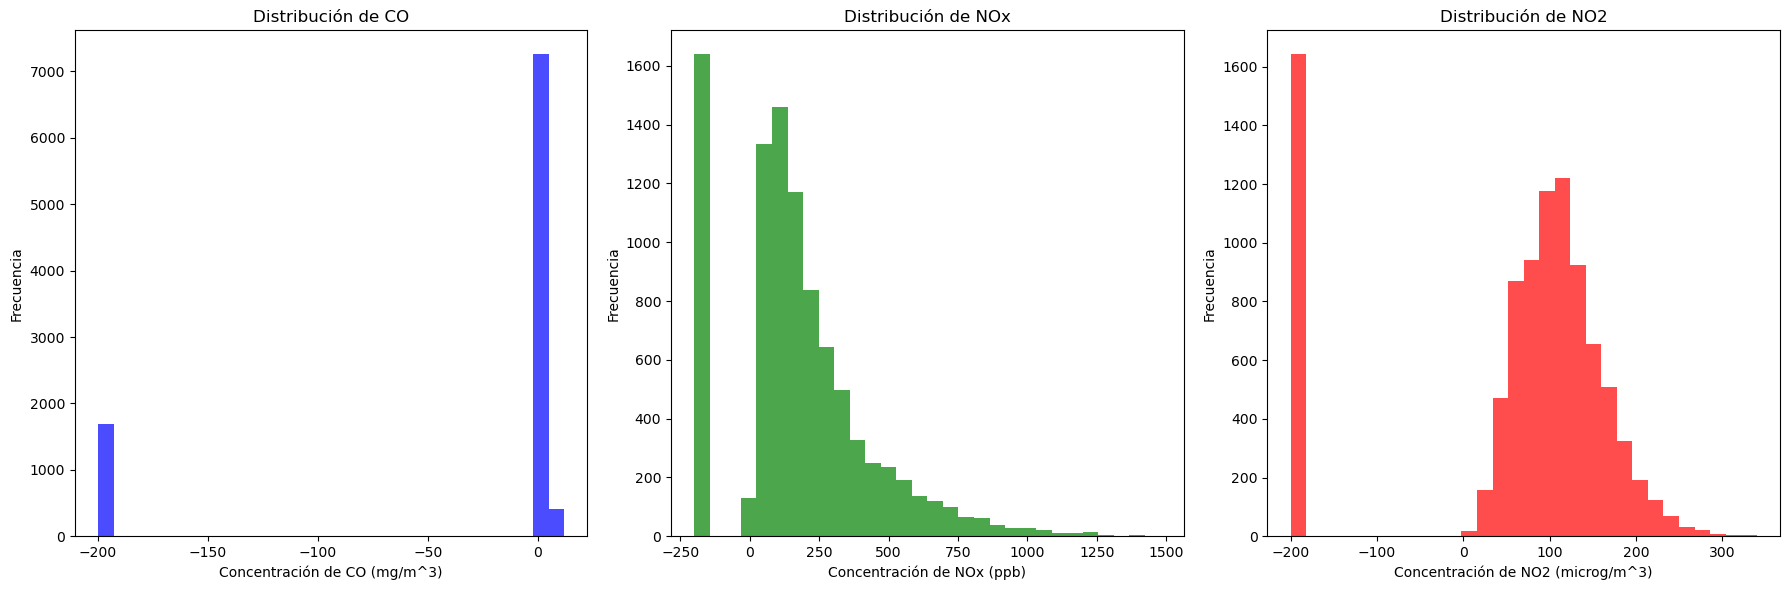

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].hist(airQData['CO(GT)'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Distribución de CO')
axs[0].set_xlabel('Concentración de CO (mg/m^3)')
axs[0].set_ylabel('Frecuencia')

# Histograma para NOx
axs[1].hist(airQData['NOx(GT)'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Distribución de NOx')
axs[1].set_xlabel('Concentración de NOx (ppb)')
axs[1].set_ylabel('Frecuencia')

# Histograma para NO2
axs[2].hist(airQData['NO2(GT)'], bins=30, color='red', alpha=0.7)
axs[2].set_title('Distribución de NO2')
axs[2].set_xlabel('Concentración de NO2 (microg/m^3)')
axs[2].set_ylabel('Frecuencia')

# Ajusta el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

Como se puede ver en las gráficas si hay valores faltantes (-200) estos se van sustituir por Nan para que pandas los detecte como nulos y así se puedan tratar y calcular sus estadísticas correctamente. Concretamente se van a reemplazar por la media para no tener que borrar instancias y no perder datos:

C:\Users\annag\AppData\Local\Temp\ipykernel_11500\3131019890.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  airQData = airQData.fillna(airQData.mean())


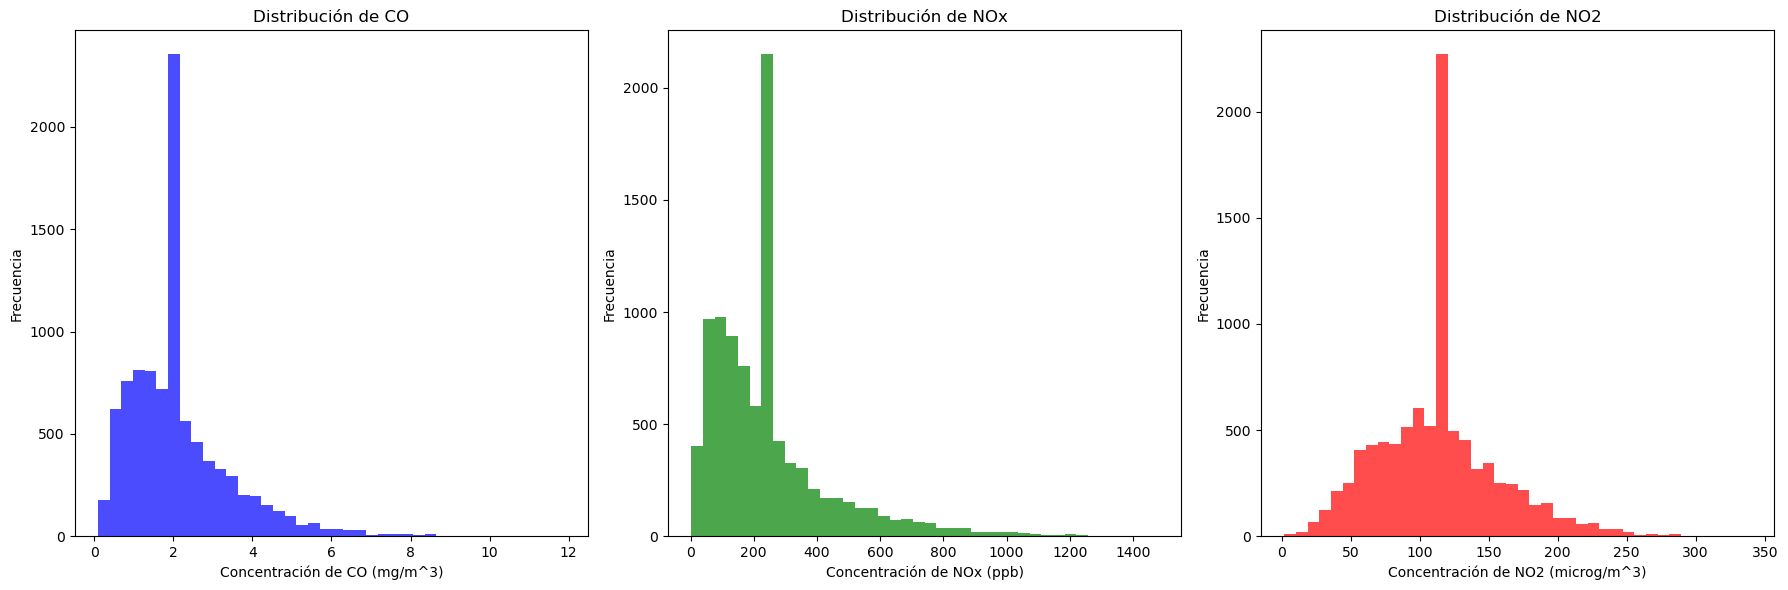

count    9357.000000
mean        2.152750
std         1.316068
min         0.100000
25%         1.200000
50%         2.152750
75%         2.600000
max        11.900000
Name: CO(GT), dtype: float64 

count    9357.000000
mean      246.896735
std       193.426632
min         2.000000
25%       112.000000
50%       229.000000
75%       284.000000
max      1479.000000
Name: NOx(GT), dtype: float64 

count    9357.000000
mean      113.091251
std        43.920954
min         2.000000
25%        86.000000
50%       113.091251
75%       133.000000
max       340.000000
Name: NO2(GT), dtype: float64


In [13]:
import numpy as np

airQData.replace(-200, np.nan, inplace=True)
airQData = airQData.fillna(airQData.mean())

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].hist(airQData['CO(GT)'], bins=40, color='blue', alpha=0.7)
axs[0].set_title('Distribución de CO')
axs[0].set_xlabel('Concentración de CO (mg/m^3)')
axs[0].set_ylabel('Frecuencia')

# Histograma para NOx
axs[1].hist(airQData['NOx(GT)'], bins=40, color='green', alpha=0.7)
axs[1].set_title('Distribución de NOx')
axs[1].set_xlabel('Concentración de NOx (ppb)')
axs[1].set_ylabel('Frecuencia')

# Histograma para NO2
axs[2].hist(airQData['NO2(GT)'], bins=40, color='red', alpha=0.7)
axs[2].set_title('Distribución de NO2')
axs[2].set_xlabel('Concentración de NO2 (microg/m^3)')
axs[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print(airQData['CO(GT)'].describe(),"\n")
print(airQData['NOx(GT)'].describe(),"\n")
print(airQData['NO2(GT)'].describe())

Podemos observar que las tres presentan 9357 instancias eso es porque los valores nulos se han sustituido, y no eliminado, por la media. Las dos primeras gráficas muestran una distibución más exponencial, mientras que la de la derecha es más cercana a una normal acampanada. Los picos que se ven corresponden a la media que obtiene tantos valores ya que había muchos valores nulos y todos estos se han rellenado con este valor de la media.

In [14]:
## ¿cómo son las correlaciones entre las variables del dataset?

C:\Users\annag\AppData\Local\Temp\ipykernel_11500\3107115124.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = airQData.corr(method='pearson')


[Text(0.5, 0, 'CO(GT)'),
 Text(1.5, 0, 'PT08.S1(CO)'),
 Text(2.5, 0, 'NMHC(GT)'),
 Text(3.5, 0, 'C6H6(GT)'),
 Text(4.5, 0, 'PT08.S2(NMHC)'),
 Text(5.5, 0, 'NOx(GT)'),
 Text(6.5, 0, 'PT08.S3(NOx)'),
 Text(7.5, 0, 'NO2(GT)'),
 Text(8.5, 0, 'PT08.S4(NO2)'),
 Text(9.5, 0, 'PT08.S5(O3)'),
 Text(10.5, 0, 'T'),
 Text(11.5, 0, 'RH'),
 Text(12.5, 0, 'AH')]

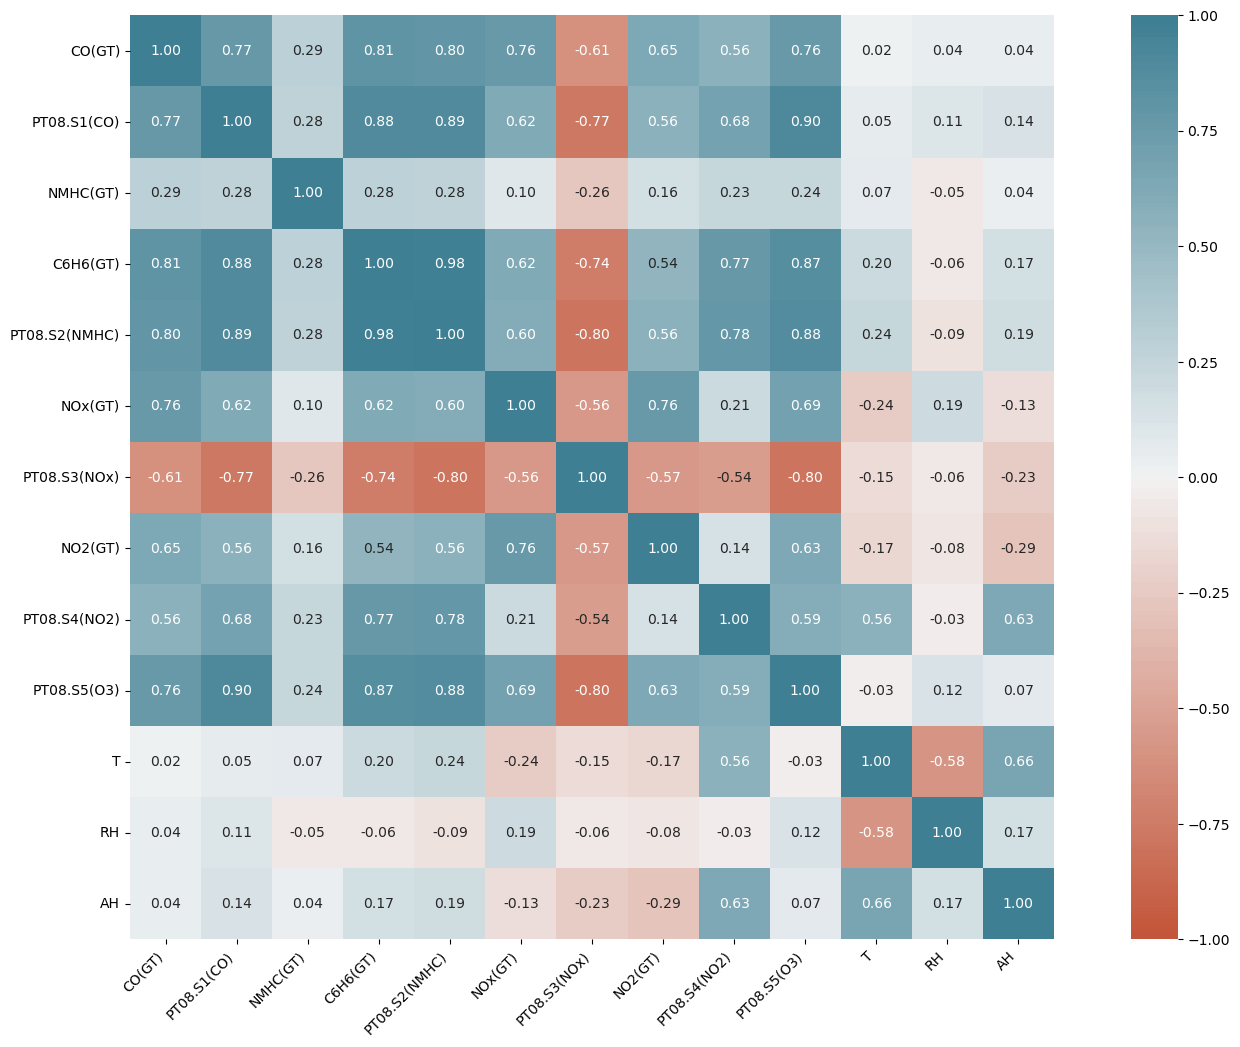

In [15]:
import seaborn as sns

corr = airQData.corr(method='pearson')
# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(20,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

In [16]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?

Según el estudio de correlaciones las variables más relacionadas con la cariable objetivo (CO(GT)) son C6H6(GT) que representa la concentración de benceno en microgramos por metro cúbico, PT08.S2(NMHC) que indica la respuesta promediada por hora de un sensor específico dirigido a los hidrocarburos no metánicos (NMHC) y PT08.S1(CO) la respuesta promediada por hora de otro sensor dirigido al monóxido de carbono (CO). Esta última variable es esperable que tenga correlación con la variable objetivo ya que esta relacionada también con el monóxido de carbono. Las dos primeras es posible que tengan una correlación ya que son componentes realcionadas con la contaminación del aire.

In [17]:
## ¿existe alguna variable que no tenga correlación?

Las variables T, RH y AH son las que menos correlación presentan con un 0.02, 0.04 y 0.04 respectivamente.

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

En base al EDA, podemos extraer que estadísticamente las variables relacionadas con los compuestos químicos en el aire son las que presetnan más correlación con la variable objetivo, sin emabrgo, variables como la temperatura o la humedad están menos correlacionadas. Aún así, podemos señalar que la falta de correlación no siempre significa que no haya una relación entre las variables; simplemente, puede indicar que la relación no es lineal.

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [18]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


scaler = StandardScaler()

In [19]:
# separar datos de entrenamiento y test

In [20]:
from sklearn.model_selection import train_test_split
X = airQData[['C6H6(GT)']] #variable independiente
y = airQData['CO(GT)'] #variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = DataFrame(scaler.fit_transform(X_train))
X_test = DataFrame(scaler.fit_transform(X_test))

In [21]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

Se va a escoger C6H6(GT) porque es la que mayor correlación presenta con la variable objetivo CO(GT)

In [22]:
# entrena el modelo con los datos de entrenamiento

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

La regresión lineal simple viene dada por la ecuación _y = mx + b_
Al entrenar el modelo este aprende m y b.

In [25]:
m = model.coef_[0]
b = model.intercept_
print(f"Pendiente (Coeficiente): {m}")
print(f"Interceptación: {b}")

Pendiente (Coeficiente): 1.0539029564160691
Interceptación: 2.150631346961145


Explica qué indican estos parámetros

| Parámetros | Definición |
|------------|------------|
| y | Variable objetivo CO(GT) |
| x | variable independiente C6H6(GT) |
| m | pendiente de la recta (coeficiente) |
| b | Interceptación (constante) |

In [26]:
# realiza las predicciones para el conjunto de datos de test

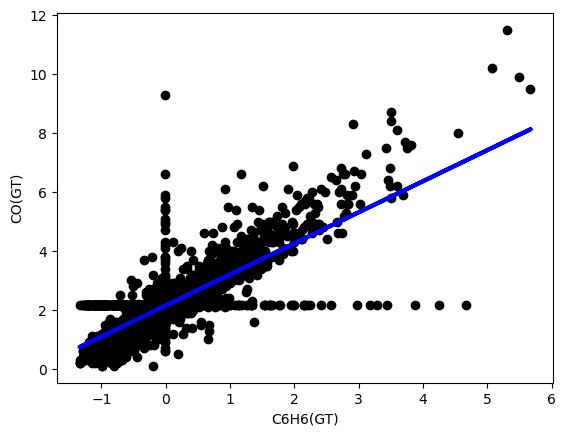

In [27]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('C6H6(GT)')
plt.ylabel('CO(GT)')
plt.show()

In [28]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

_indica aquí tu respuesta_

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R^2): {r2}')
rmlse = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
print(f'Root Mean Squared Logarithmic Error (RMSLE): {rmlse}')

Mean Absolute Error (MAE): 0.5275114995344128
R-squared (R^2): 0.6831828008938847
Root Mean Squared Logarithmic Error (RMSLE): 0.23350467994410468


In [30]:
# ¿Qué error tiene el modelo? Explícalo.

Este modelo presenta un MAE alto y un R^2 y RMSLE bajos. Elegir una métrica de error mejor o peor depende del objetivo que tengamos con las predicciones. Por ejemplo, un RMSLE penaliza un under-prediction, por lo que si se necesita saber la contaminación marcada por CO(GT) en un caso en el que si el valor es alto se deban tomar acciones para bajar la contaminación, tal vez sea de interés penalizar under-prections por la seguridad ciudadana.

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

Como el dataset tiene variables no numericas como la fecha y la hora y se requiere trabajar con todas las variables estan se van a modificar para poder utilizarse. Básicamente se van a crear columnas nuevas para el dia, mes y año en vez de estar en una misma columna las tres. Para el tiempo se va a guardar la hora sola ya que los compuestos se miden en horas puntas.

In [31]:
airQData['Date'] = pd.to_datetime(airQData['Date'],format='%d/%m/%Y')
airQData['Year'] = airQData['Date'].dt.year
airQData['Month'] = airQData['Date'].dt.month
airQData['Day'] = airQData['Date'].dt.day
airQData['Time'] = pd.to_datetime(airQData['Time'], format='%H.%M.%S')
airQData['Hour'] = airQData['Time'].dt.hour

X = airQData.drop(['CO(GT)','Date', 'Time'], axis=1) #variable independiente
y = airQData['CO(GT)'] #variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = DataFrame(scaler.fit_transform(X_train))
X_test = DataFrame(scaler.fit_transform(X_test))

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

Este modelo presenta un error menor como se puede ver en el código siguiente. Esto puede indicar que para predecir la variable objetivo CO(GT) es necesario contemplar más variables no solo una. Ya por general las 3 métricas empleadas muestran una mejora en el rendimiento.

In [34]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R^2): {r2}')
rmlse = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
print(f'Root Mean Squared Logarithmic Error (RMSLE): {rmlse}')

Mean Absolute Error (MAE): 0.38462445297917136
R-squared (R^2): 0.8270012776826168
Root Mean Squared Logarithmic Error (RMSLE): 0.1951685366604723


#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegresson necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

| Hiperparámetros | Definición |
|-----------------|------------|
| criterion | La función para medir la calidad de una división. Criterios admitidos son _squared_error_, _friedman_mse_, _absolute_error_, _poisson_.| 
| splitter | La estrategia utilizada para elegir la división en cada nodo. Puede ser "best" (elige la mejor división) o "random" (elige la mejor división al azar). | 
| max_depth | La profundidad máxima del árbol. Si es 'None', los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de _min_samples_split_ muestras. |
| min_samples_split | El número mínimo de muestras necesarias para dividir un nodo interno. Si es un _int_, se considera _min_samples_split_ como el número mínimo. Si es _float_, entonces _min_samples_split_ es una fracción y _ceil(min_samples_split * n_samples)_ es el número mínimo de muestras para cada división. | 
| min_samples_leaf | El número mínimo de muestras necesarias para estar en un nodo de hoja. Si es _int_, se considera _min_samples_leaf_ como el número mínimo. Si es _float_, entonces _min_samples_leaf_ es una fracción y _ceil(min_samples_leaf * n_samples)_ es el número mínimo de muestras para cada nodo.| 
| max_features | El número máximo de características a considerar para la mejor división. Si es _int_, se considera las características _max_features_ en cada división. Si es _float_, entonces _max_features_ es una fracción y las características _max(1, int(max_features * n_features_in_))_ se consideran en cada división. Si es "sqrt", entonces _max_features=sqrt(n_features)_. Si es "log2", entonces _max_features=log2(n_features)_. | 


Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Indica que un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor, es decir, controla si se debe realizar una división en un nodo. Este valor marca la cantidad mínima de mejora que debe tener una división para realizarse, de esta manera se evitan divisiones innecesarias ayudando a controlar la complejidad del árbol y el sobreajuste.

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [35]:
from sklearn.tree import DecisionTreeRegressor
X = airQData.drop(['CO(GT)','Date', 'Time'], axis=1) #variables independientes
y = airQData['CO(GT)'] #variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = DataFrame(scaler.fit_transform(X_train))
X_test = DataFrame(scaler.fit_transform(X_test))

dt_model = DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=None)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_leaf=2,
                      min_samples_split=10)

In [36]:
y_pred = dt_model.predict(X_test)

Calcula MAE, R2 y RMSLE

In [37]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R^2): {r2}')
rmlse = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
print(f'Root Mean Squared Logarithmic Error (RMSLE): {rmlse}')

Mean Absolute Error (MAE): 0.38458498080140474
R-squared (R^2): 0.7968688956349619
Root Mean Squared Logarithmic Error (RMSLE): 0.19467686261974837


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

Para comprobar si hay overfitting se puede comparar el rendimiento en el conjunto de train y en el de test. Si el rendimiento es mucho mejor en el de train en comparación al de test, podría ser indicativo de overfitting. En el código siguiente se calcula el rendimiento del modelo para el conjunto de train. Los resultados muestran que podría haber overfitting ya que, el coeficiente r^2 está más cercano al 1 (bastante alto en 0.93) en el de train que en el de test (0.79).

In [38]:
y_pred_train = dt_model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'Mean Absolute Error TRAIN (MAE): {mae_train}')
r2_train = r2_score(y_train, y_pred_train)
print(f'R-squared TRAIN (R^2): {r2_train}')
rmsle_train = np.sqrt(mean_squared_error(np.log1p(y_train), np.log1p(y_pred_train)))
print(f'Root Mean Squared Logarithmic Error TRAIN (RMSLE): {rmsle_train}')

Mean Absolute Error TRAIN (MAE): 0.22264071267506577
R-squared TRAIN (R^2): 0.9302213141732348
Root Mean Squared Logarithmic Error TRAIN (RMSLE): 0.1243753058587868


¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

El arbol de decisión muestra mejores resultados que la regresión lineal simple. Sin embargo, los resultados del árbol frente a la regresión múltiple son bastante similares mostrando la regresión lineal mejoras en el MAE y el R^2.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

La regresión lineal simple es la que peores resultados ha mostrado por lo que el mejor modelo estaría entre el árbol de decisión o la regresión múltiple. Esto muestra que el nivel de contaminación en base al CO(GT) no depende exclusivamente de un factor sinó que más variables están implicadas. Como se ha mencionado antes la mejor métrica de error depende del objetivo que se tenga igual que escoger el mejor modelo, en este caso, los resultados de ambos son muy similares por lo que escoger uno u otro tal vez requeriría de reajustar un poco el escenario (ajustar hiperparámetros para evitar sobreajuste) y saber que objetivo se tiene (penalizar over-prediction o under-prediction).

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

Ahumada Cervantes, M. D. L. A., Díaz Martínez, M. A., & Melo Morín, J. P. (2021). Árboles de Decisión como Metodología para Determinar el Rendimiento Académico en Educación Superior.

http://repository.unilasallista.edu.co/dspace/bitstream/10567/3221/1/2724-Texto%20del%20art%c3%adculo-210214781-1-10-20211213.pdf